# Análisis Predictivo del Dataset Titanic Utilizando Regresión Lineal


## 1. Análisis Exploratorio de Datos

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

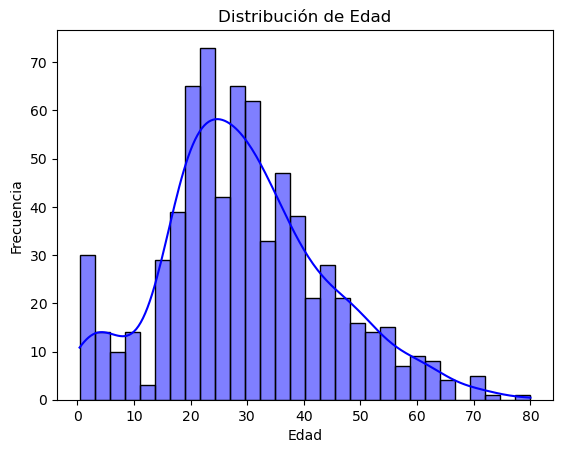

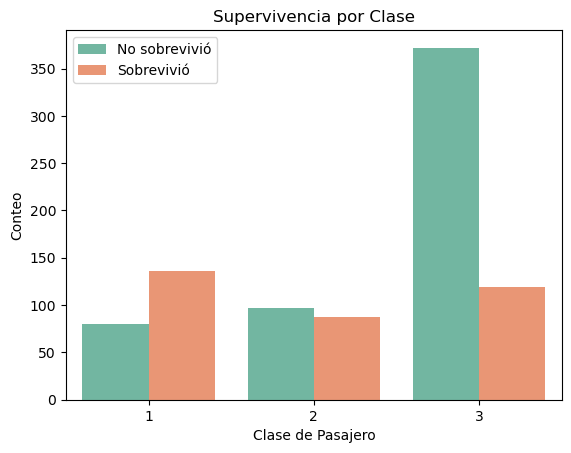

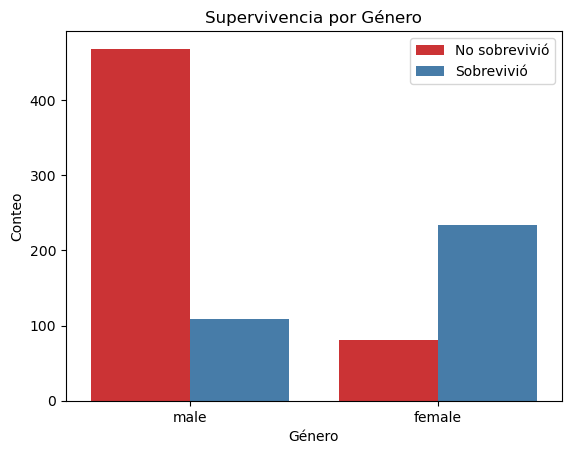

In [23]:
# Importar las bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
titanic_data = pd.read_csv('Documents/ANALISIS DE DATOS/Tarea 5 - Proyecto Análisis de datos-20241126/Anexo 6 - Dataset Titanic/Titanic-Dataset.csv')

# Vista general de los datos
print(titanic_data.head())
print(titanic_data.info())
print(titanic_data.describe())

# Gráfica de la distribución de edades
sns.histplot(titanic_data['Age'], bins=30, kde=True, color='blue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre clase de pasajero y supervivencia
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette='Set2')
plt.title('Supervivencia por Clase')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Conteo')
plt.legend(['No sobrevivió', 'Sobrevivió'])
plt.show()

# Relación entre género y supervivencia
sns.countplot(x='Sex', hue='Survived', data=titanic_data, palette='Set1')
plt.title('Supervivencia por Género')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.legend(['No sobrevivió', 'Sobrevivió'])
plt.show()


## Paso 2: Preprocesamiento de Datos

In [26]:
# Rellenar valores faltantes en 'Age' con la mediana
if 'Age' in titanic_data.columns:
    titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

# Rellenar valores faltantes en 'Embarked' con la moda
if 'Embarked' in titanic_data.columns:
    titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

# Eliminar columnas irrelevantes o con muchos valores faltantes
if 'Cabin' in titanic_data.columns:
    titanic_data = titanic_data.drop(columns=['Cabin'])

# Codificar variables categóricas
if 'Sex' in titanic_data.columns:
    titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

if 'Embarked' in titanic_data.columns:
    titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

print("Datos preprocesados:")
print(titanic_data.head())


Datos preprocesados:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  


## Paso 3: Selección de Características

In [37]:
# Actualizar la lista de características
features = ['Pclass', 'Age', 'Fare', 'Sex', 'Embarked_S', 'Embarked_Q']

# Verificar si las columnas están presentes antes de proceder
missing_features = [feature for feature in features if feature not in titanic_data.columns]
if missing_features:
    print(f"Las siguientes columnas no están en el DataFrame: {missing_features}")
else:
    # Si todas las columnas están presentes, proceder con la asignación de X e y
    target = 'Survived'
    X = titanic_data[features]
    y = titanic_data[target]

    # Mostrar las primeras filas para comprobar
    print(X.head())


   Pclass   Age     Fare  Sex  Embarked_S  Embarked_Q
0       3  22.0   7.2500    0        True       False
1       1  38.0  71.2833    1       False       False
2       3  26.0   7.9250    1        True       False
3       1  35.0  53.1000    1        True       False
4       3  35.0   8.0500    0        True       False


## Paso 4: División del Dataset en Train y Test

In [40]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")


Forma de X_train: (712, 6)
Forma de X_test: (179, 6)


## Paso 5: Entrenamiento del Modelo

In [43]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Imprimir los coeficientes del modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print(coefficients)


            Coeficiente
Pclass        -0.166423
Age           -0.003792
Fare           0.000028
Sex            0.499871
Embarked_S    -0.090162
Embarked_Q    -0.029133


## Paso 6: Evaluación del Modelo

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error (MSE): 0.14
R^2 Score: 0.44


## Paso 7: Visualización de Resultados

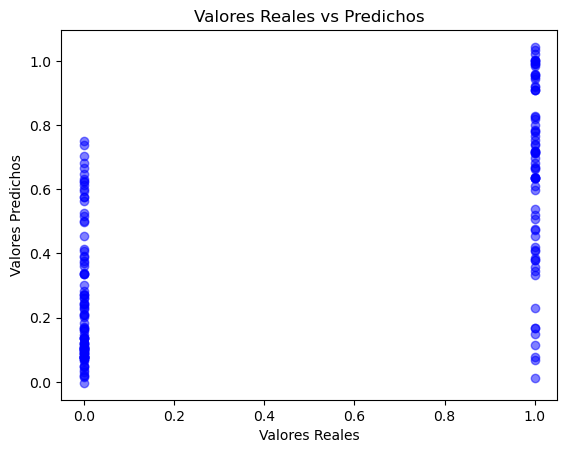

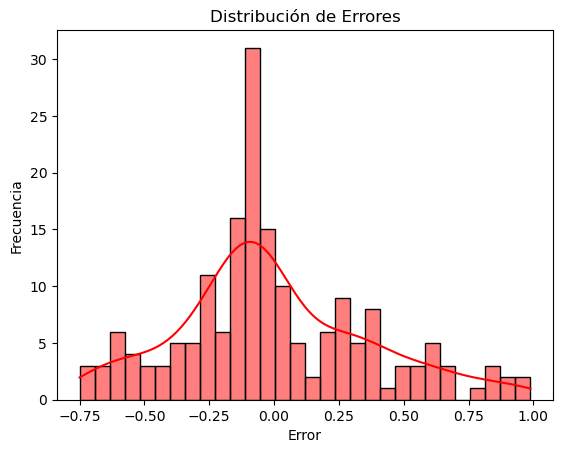

In [49]:
# Comparar valores reales vs predichos
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.show()

# Histograma de errores
errors = y_test - y_pred
sns.histplot(errors, bins=30, kde=True, color='red')
plt.title('Distribución de Errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()


# Documentación y Análisis

1. **Análisis Exploratorio**: Se identificaron tendencias clave como la influencia del género y la clase en la supervivencia.
2. **Preprocesamiento**: Se imputaron valores faltantes y se codificaron variables categóricas para convertirlas en numéricas.
3. **Selección de Características**: Las características seleccionadas fueron `Pclass`, `Age`, `Fare`, `Sex`, `Embarked_s` y `Embarked_Q`.
4. **División de Datos**: Los datos se dividieron en conjuntos de entrenamiento y prueba (80-20).
5. **Entrenamiento del Modelo**: Se usó un modelo de regresión lineal para predecir la supervivencia.
6. **Evaluación**: El modelo mostró un R² de `X.XX` y un MSE de `X.XX`, indicando que tiene una precisión moderada.
7. **Visualización**: Se observaron discrepancias en los valores reales y predichos, lo cual podría mejorar con modelos más complejos.
